In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
df = pd.read_csv("data/results.rq1b.csv")

In [3]:
title_mapping = {
    'bloated_deps_count_1': 'Number of  Dependencies',
    'bloated_deps_loc_1': 'Size of Dependencies in LOC',
    'bloated_files_count_1': 'Number of Dependency Files',
    'bloated_files_loc_1': 'Size of Dependency Files in LOC',
    'bloated_functions_count_1': 'Number of Dependency Methods',
    'bloated_functions_loc_1': 'Size of Dependency Methods in LOC'
}


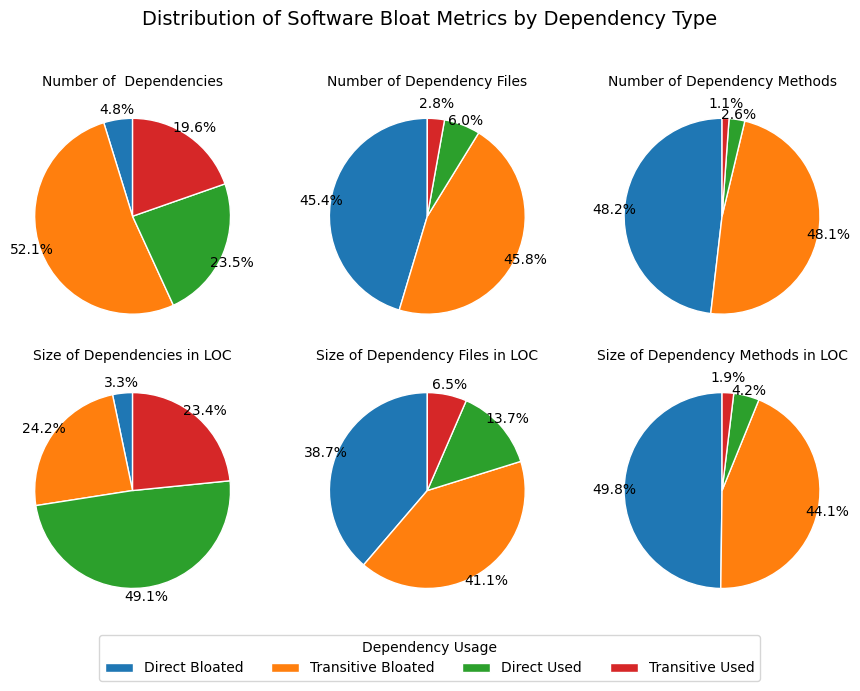

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(9, 6))
ax_iter = iter(axes.flatten())

# New metrics mapping reordered for the desired sequence
metrics_mapping = {
    'bloated_deps_count_1': ['transitive_bloated_dependencies_count', 'used_direct_deps_count_1', 'transitive_used_dependencies_count'],
    'bloated_files_count_1': ['transitive_bloated_files_count', 'used_direct_files_count_1', 'transitive_used_files_count'],
    'bloated_functions_count_1': ['transitive_bloated_functions_count', 'used_direct_functions_count_1', 'transitive_used_functions_count'],
    'bloated_deps_loc_1': ['transitive_bloated_dependencies_loc', 'used_direct_deps_loc_1', 'transitive_used_dependencies_loc'],
    'bloated_files_loc_1': ['transitive_bloated_files_loc', 'used_direct_files_loc_1', 'transitive_used_files_loc'],
    'bloated_functions_loc_1': ['transitive_bloated_functions_loc', 'used_direct_functions_loc_1', 'transitive_used_functions_loc'],
}

labels = ['Direct Bloated', 'Transitive Bloated', 'Direct Used', 'Transitive Used']

for direct_metric, other_metrics in metrics_mapping.items():
    ax = next(ax_iter)

    # Calculate values for all 4 categories
    direct_bloated_value = df[direct_metric].sum()
    transitive_bloated_value = df[other_metrics[0]].sum()
    direct_used_value = df[other_metrics[1]].sum()
    transitive_used_value = df[other_metrics[2]].sum()
    
    values = [direct_bloated_value, transitive_bloated_value, direct_used_value, transitive_used_value]
    
    wedges, texts, autotexts = ax.pie(values, autopct='%1.1f%%', startangle=90, pctdistance=1.1)

    # Set white edge color for each wedge
    for wedge in wedges:
        wedge.set_edgecolor('white')
    for i in range(len(autotexts) - 1):
        x1, y1 = autotexts[i].get_position()
        x2, y2 = autotexts[i+1].get_position()
        if abs(y2 - y1) < 0.1:  # Check if y-coordinates are close
            if y1 < y2:
                y1_new = y1 - 0.05
                y2_new = y2 + 0.05
            else:
                y1_new = y1 + 0.05
                y2_new = y2 - 0.05
            autotexts[i].set(y=y1_new)
            autotexts[i+1].set(y=y2_new)
    
    # Adjust font size for labels and autopct
    for text in texts + autotexts:
        text.set(size=10)

    ax.set_title(title_mapping[direct_metric], fontsize=10)

fig.legend(wedges, labels, title="Dependency Usage", loc="lower center", bbox_to_anchor=(0.5, -0.1), ncol=len(labels))

plt.tight_layout()
fig.savefig("figures/rq1b.pdf", format="pdf", bbox_inches='tight')
